In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
db = pd.read_csv("C:\\Users\\ireis\\Desktop\\Projetos Python\\Python\\Datasets\\anemia\\diagnosed_cbc_data_v4.csv")

In [4]:
db.isnull().sum()

# Verificado nenhum valor NA

WBC          0
LYMp         0
NEUTp        0
LYMn         0
NEUTn        0
RBC          0
HGB          0
HCT          0
MCV          0
MCH          0
MCHC         0
PLT          0
PDW          0
PCT          0
Diagnosis    0
dtype: int64

In [5]:
db.isnull().sum()

# Verificado nenhum valor NA

WBC          0
LYMp         0
NEUTp        0
LYMn         0
NEUTn        0
RBC          0
HGB          0
HCT          0
MCV          0
MCH          0
MCHC         0
PLT          0
PDW          0
PCT          0
Diagnosis    0
dtype: int64

In [6]:
lista_anemias = db['Diagnosis'].unique().tolist()

In [7]:
for anemia in lista_anemias:
    filtrado = db[db['Diagnosis'] == anemia]
    print(anemia)
    print(filtrado.describe().to_string())


Normocytic hypochromic anemia
              WBC        LYMp        NEUTp        LYMn       NEUTn         RBC         HGB          HCT         MCV          MCH        MCHC         PLT         PDW         PCT
count  279.000000  279.000000   279.000000  279.000000  279.000000  279.000000  279.000000   279.000000  279.000000   279.000000  279.000000  279.000000  279.000000  279.000000
mean     7.799928   25.803602    89.146591    1.821157    4.819113    4.517599   11.074910    53.899403   85.723728    35.954516   30.674588  199.130466   14.037011    0.283156
std      4.184077    7.816936   314.286214    1.029766    1.790291    5.235128    2.283034   220.682957    4.179455   149.272214    2.181470   85.579653    1.887977    0.970106
min      2.400000    6.200000     1.200000    0.200000    1.300000    2.170000    0.400000     2.000000   80.000000    22.600000   20.200000   12.400000    8.600000    0.010000
25%      5.500000   22.800000    64.400000    1.500000    3.800000    3.885000   10.5

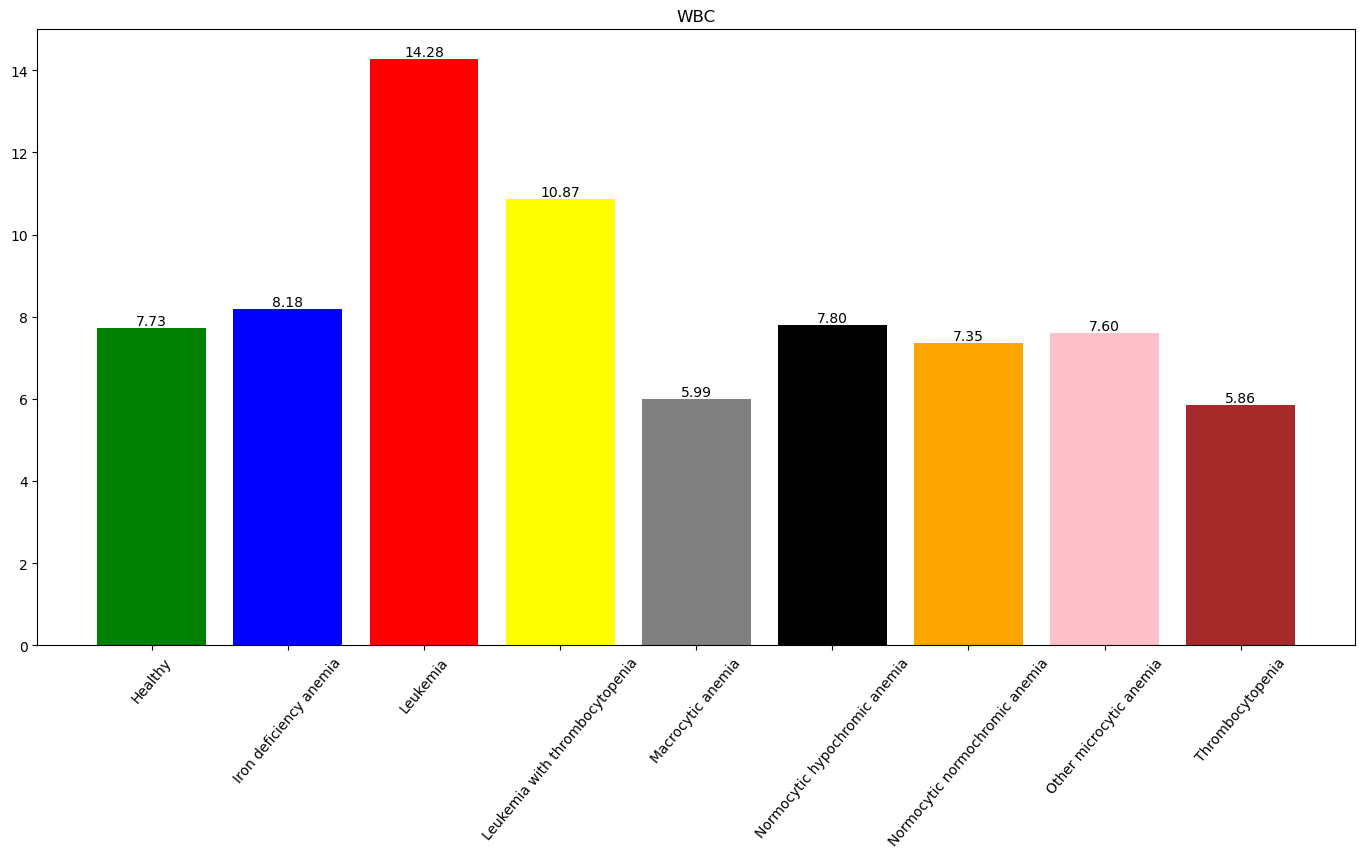

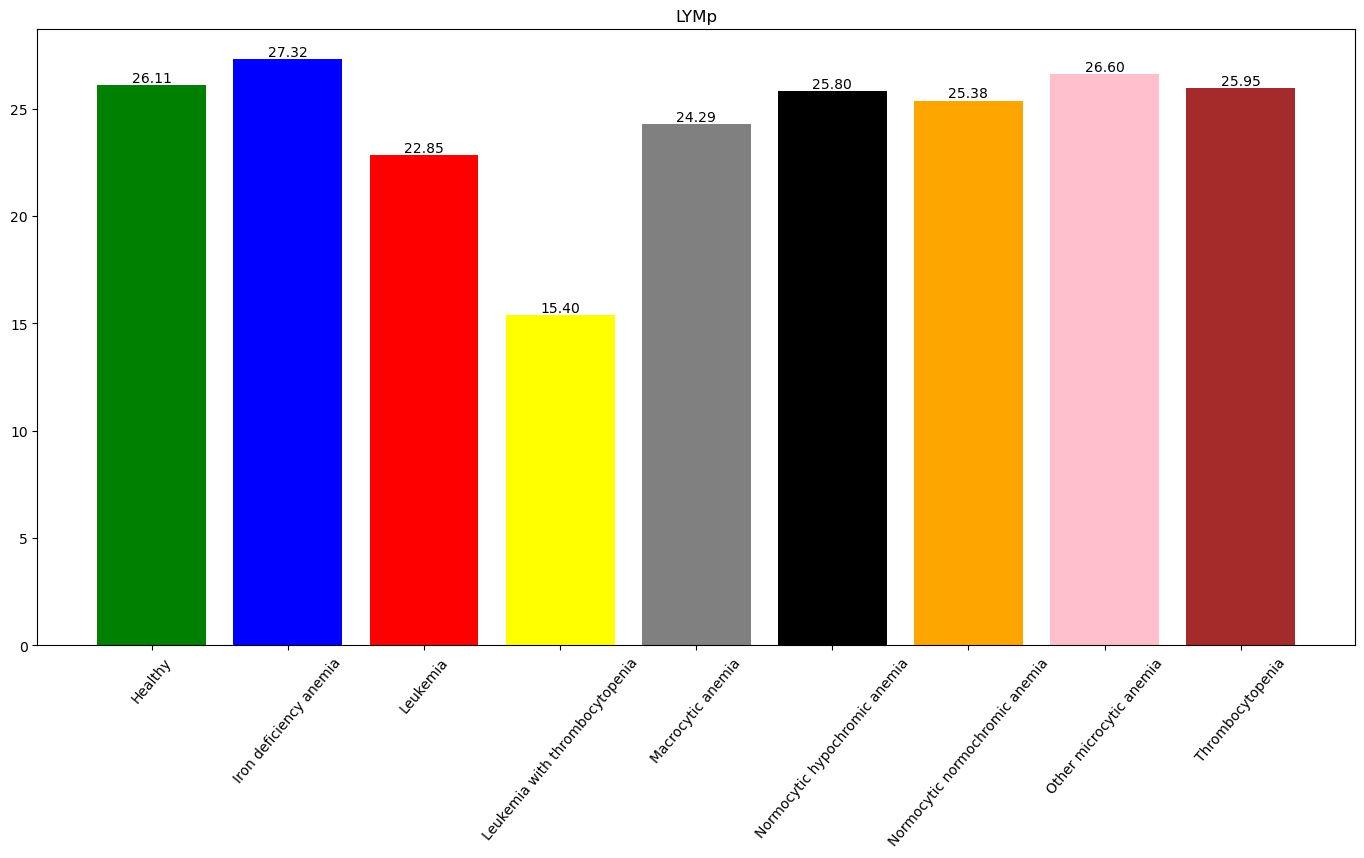

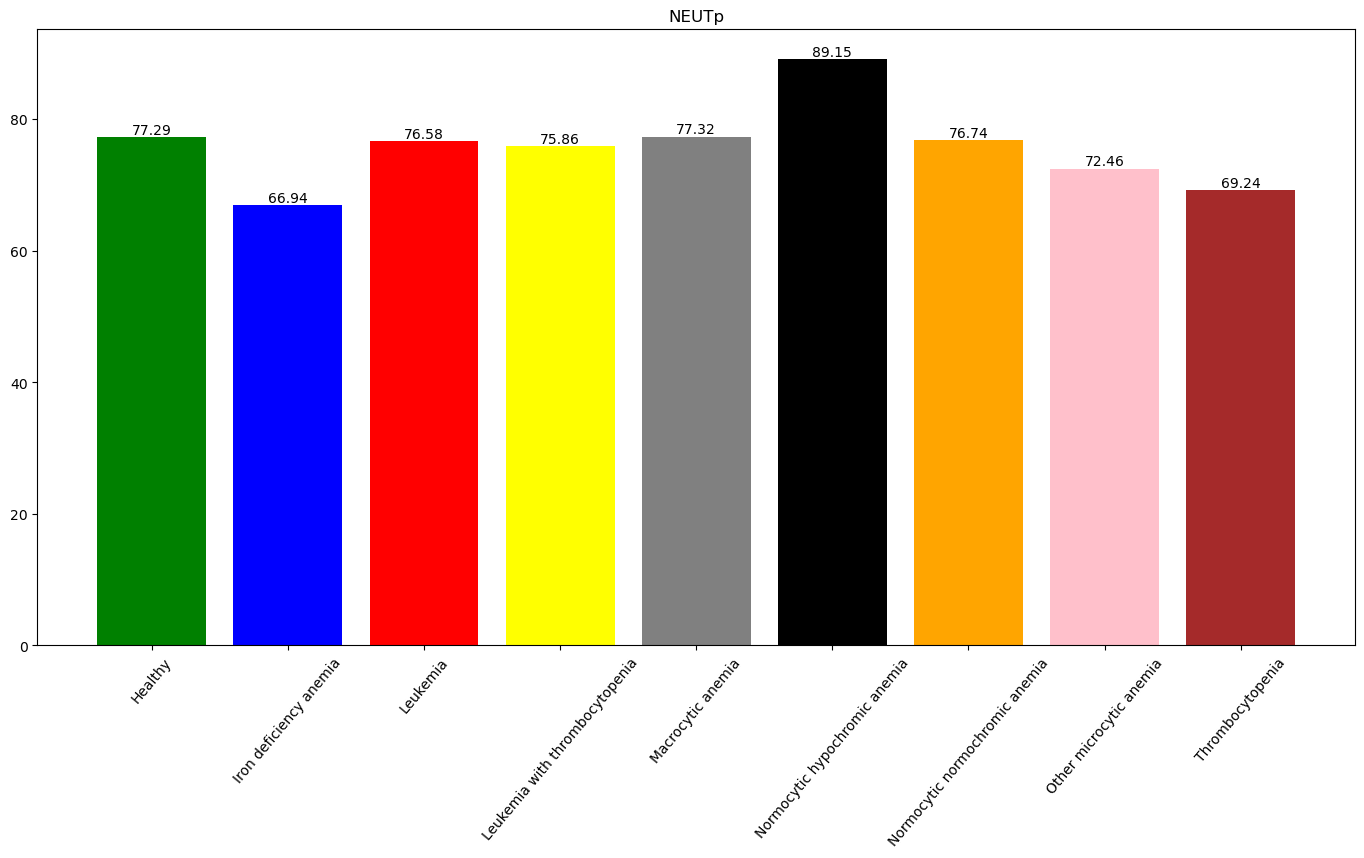

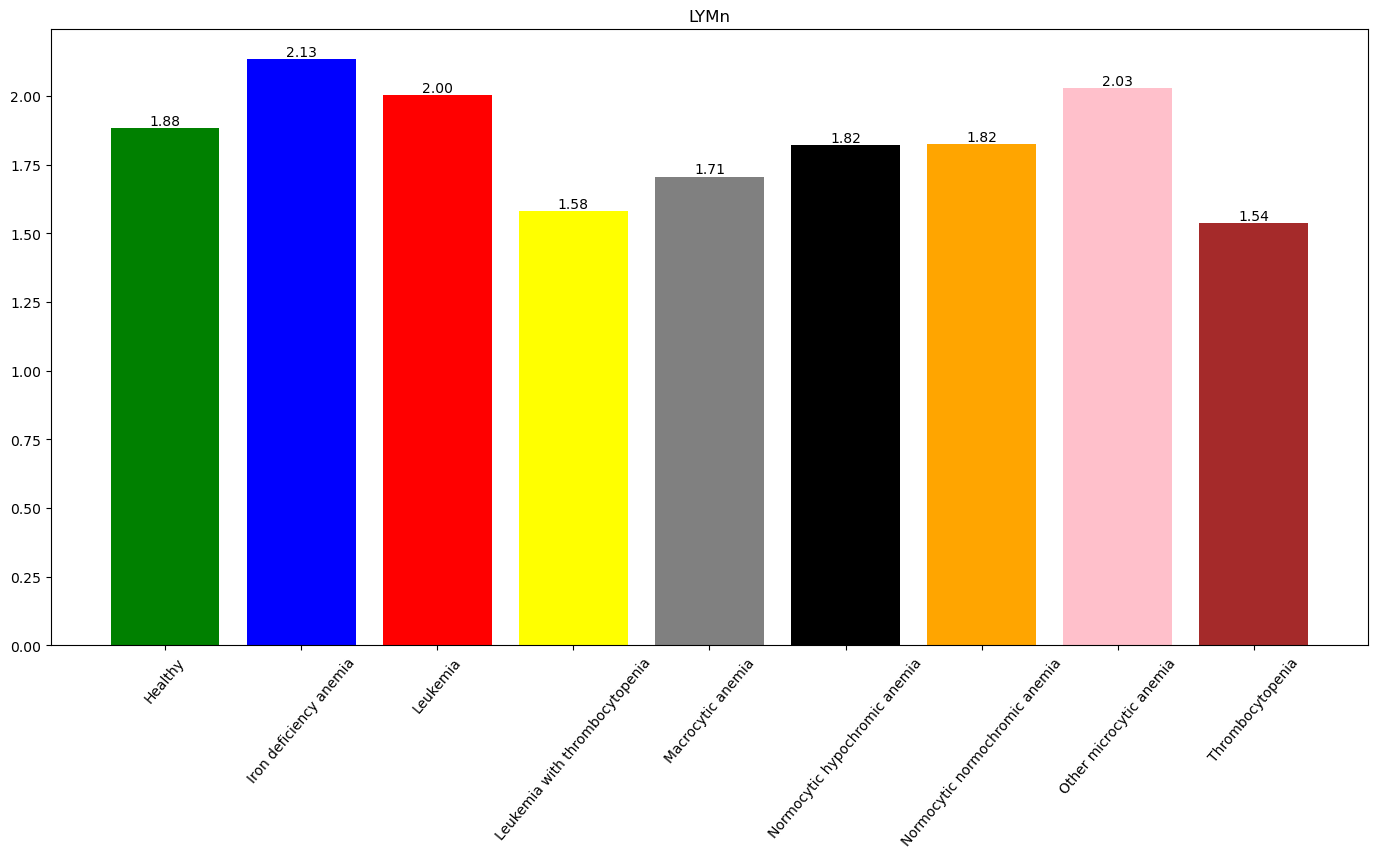

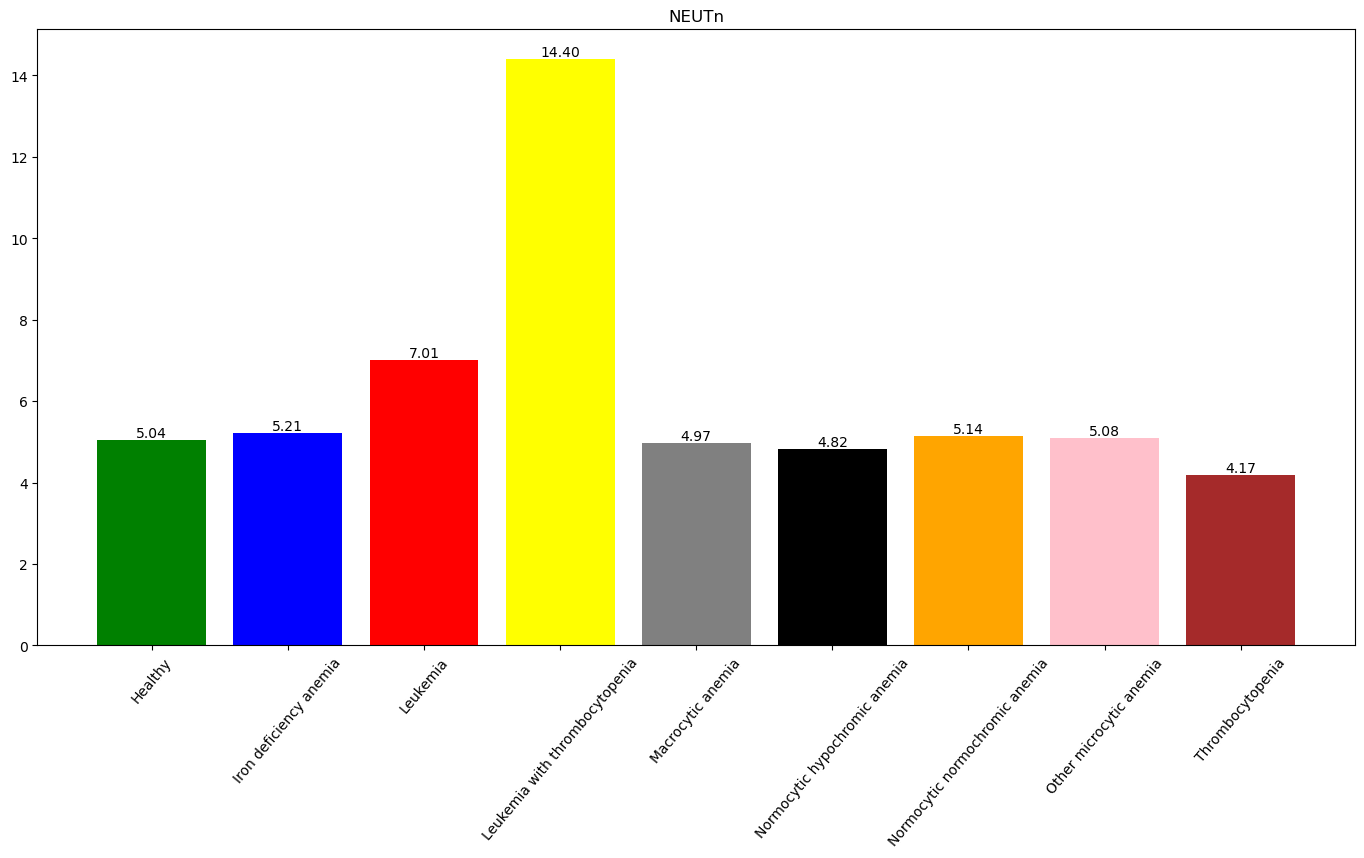

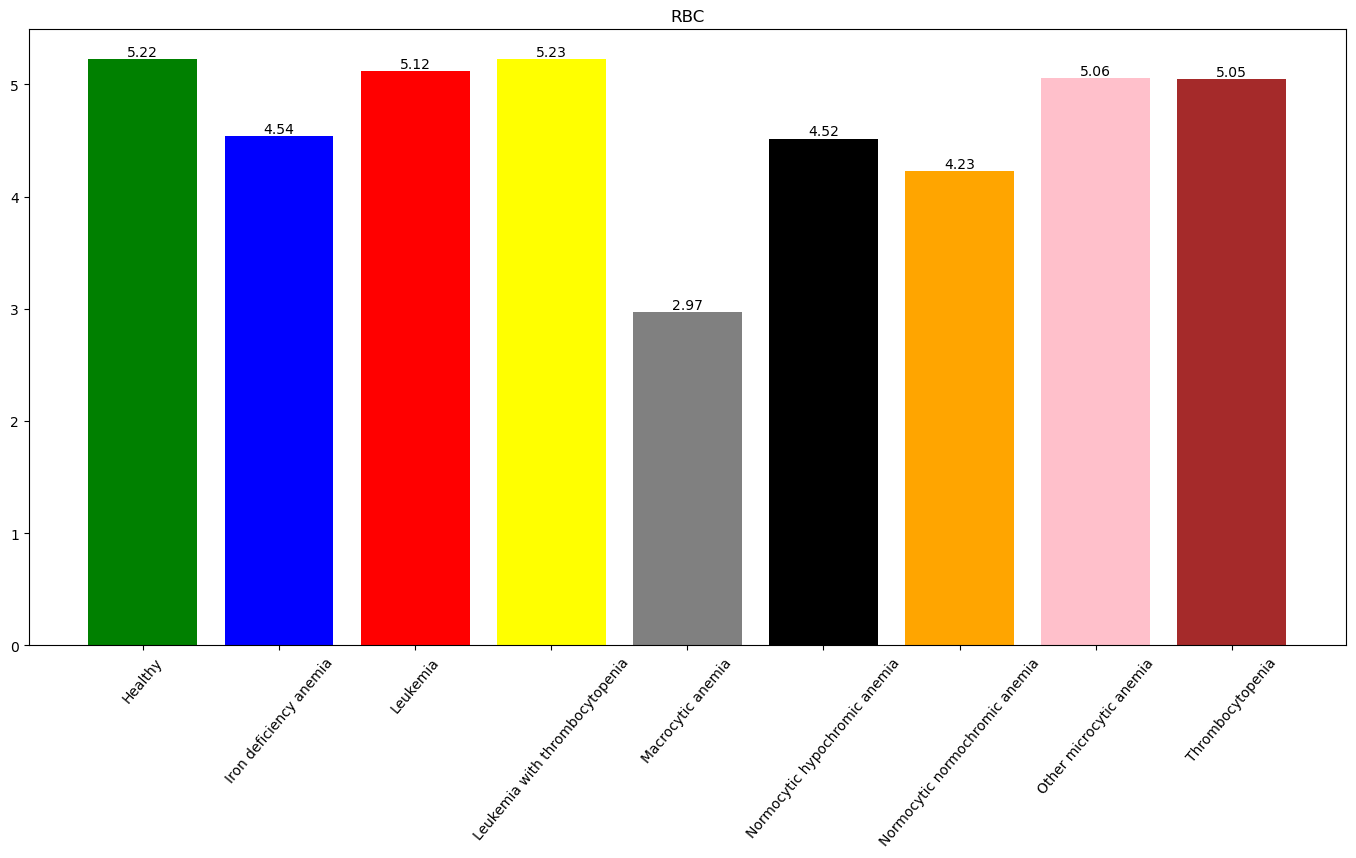

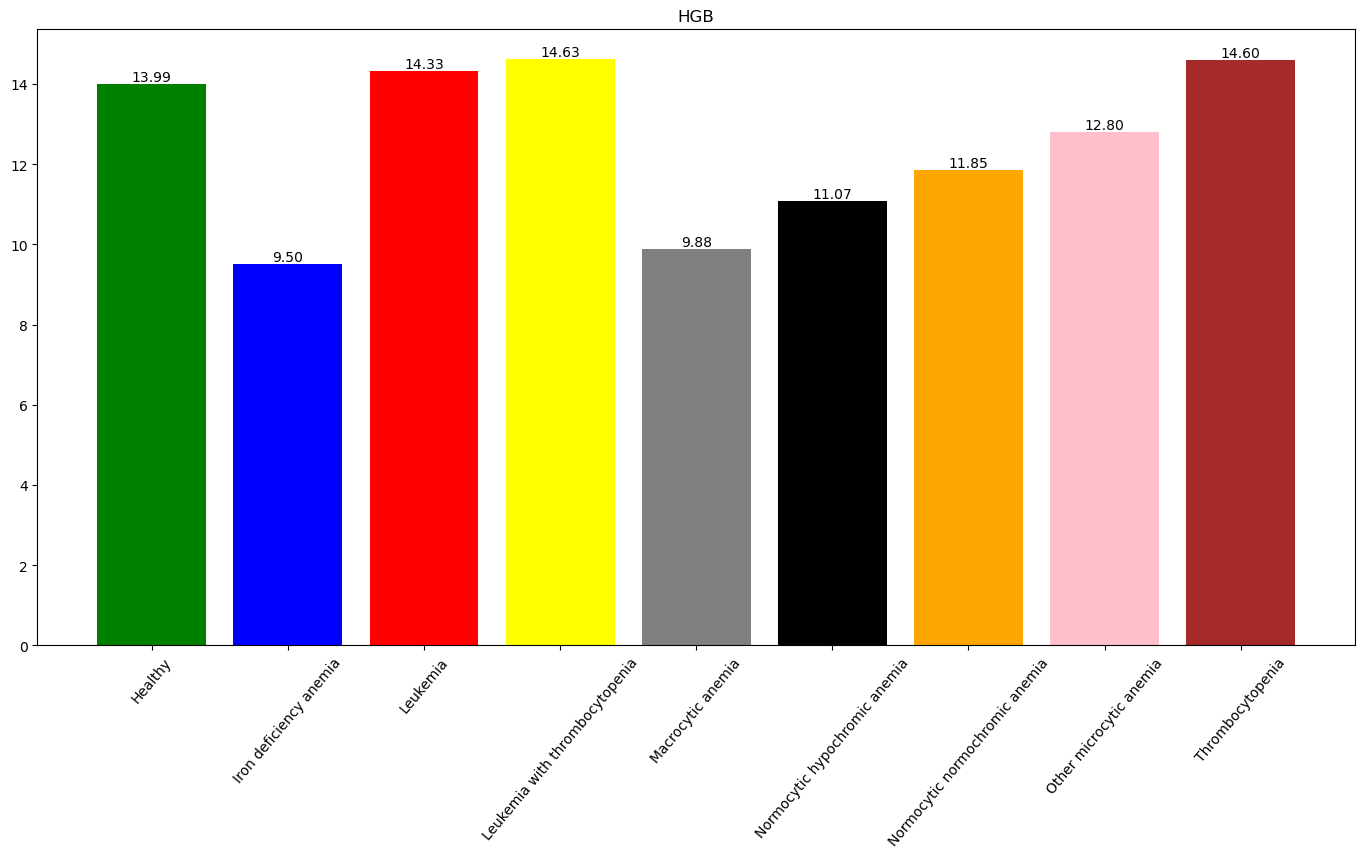

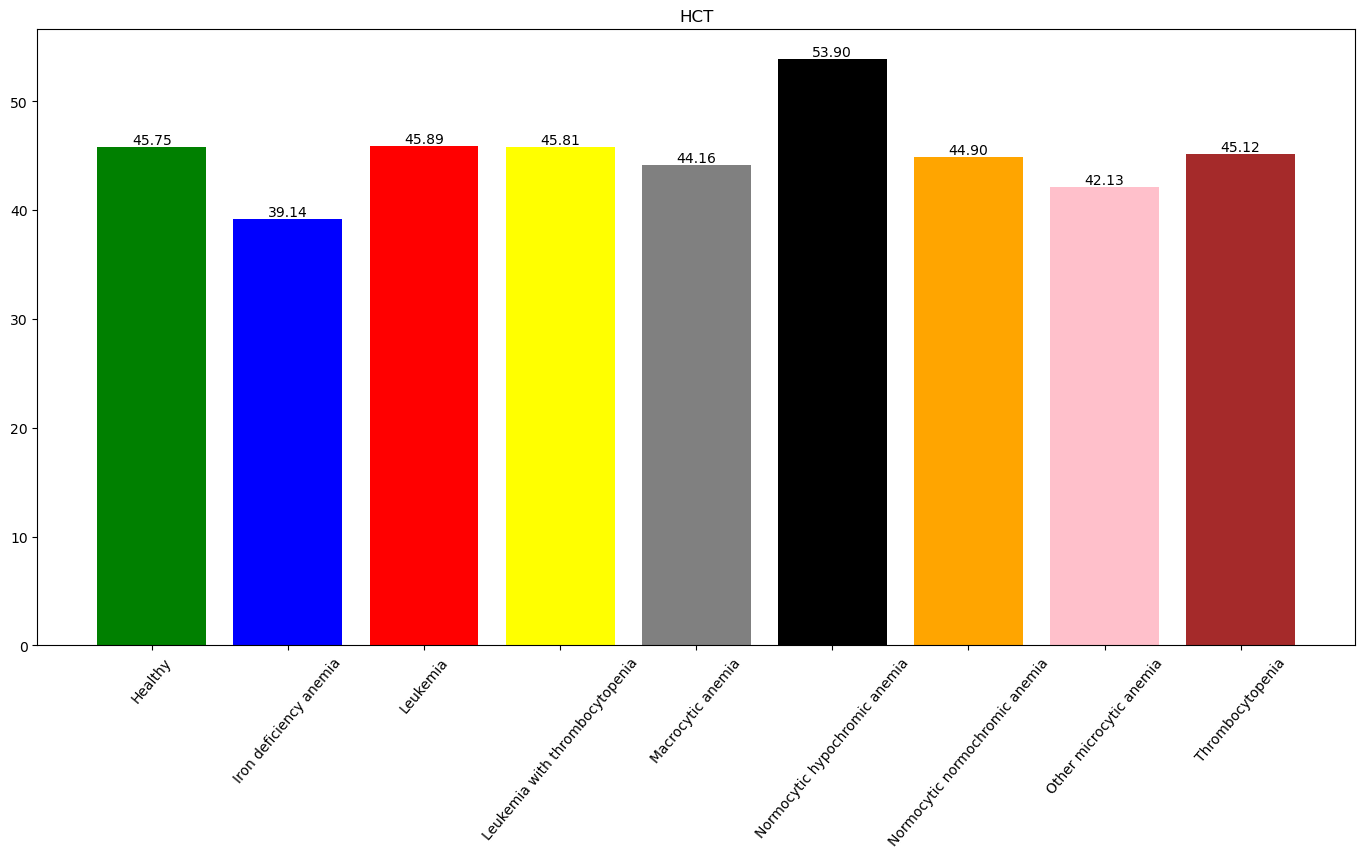

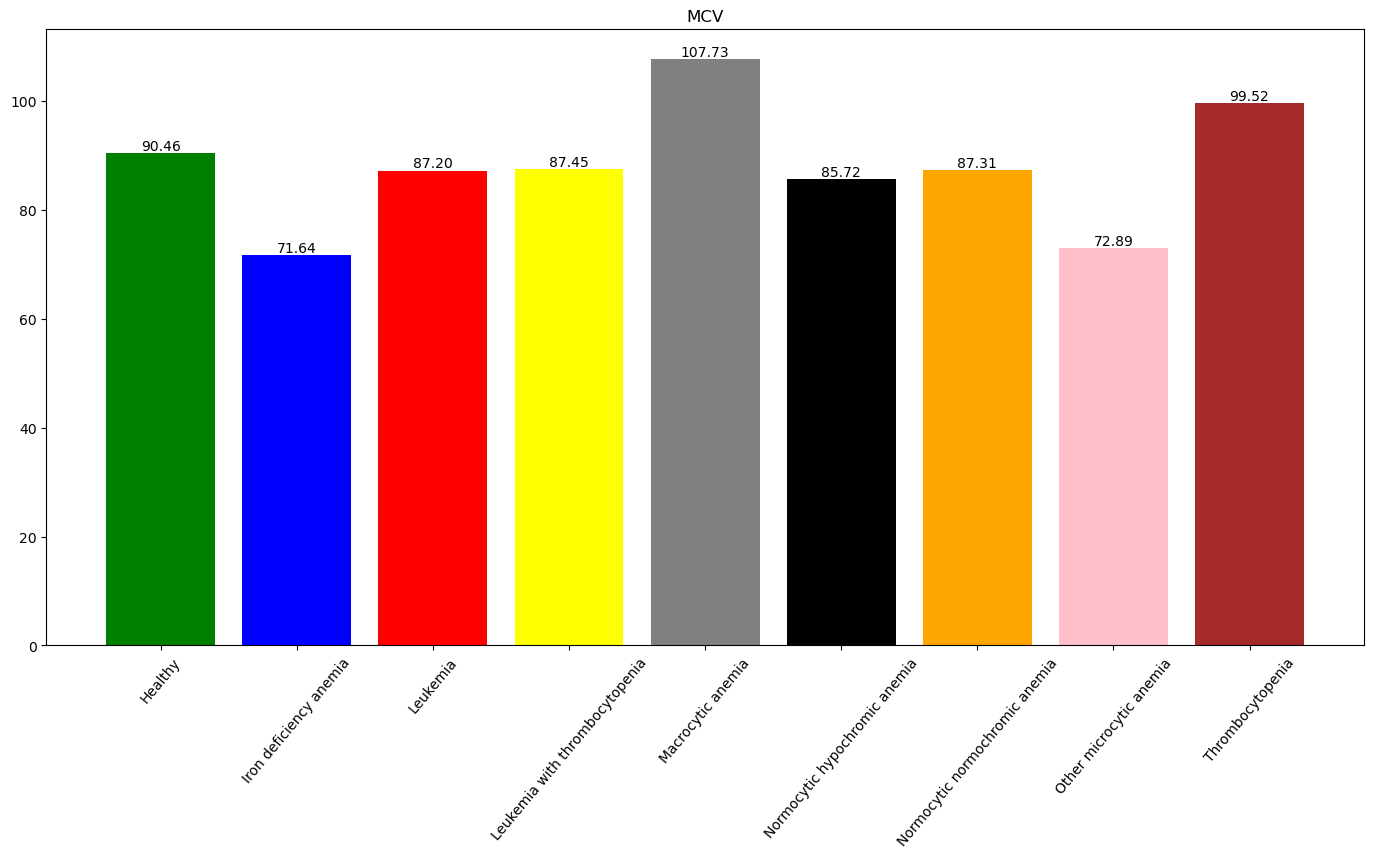

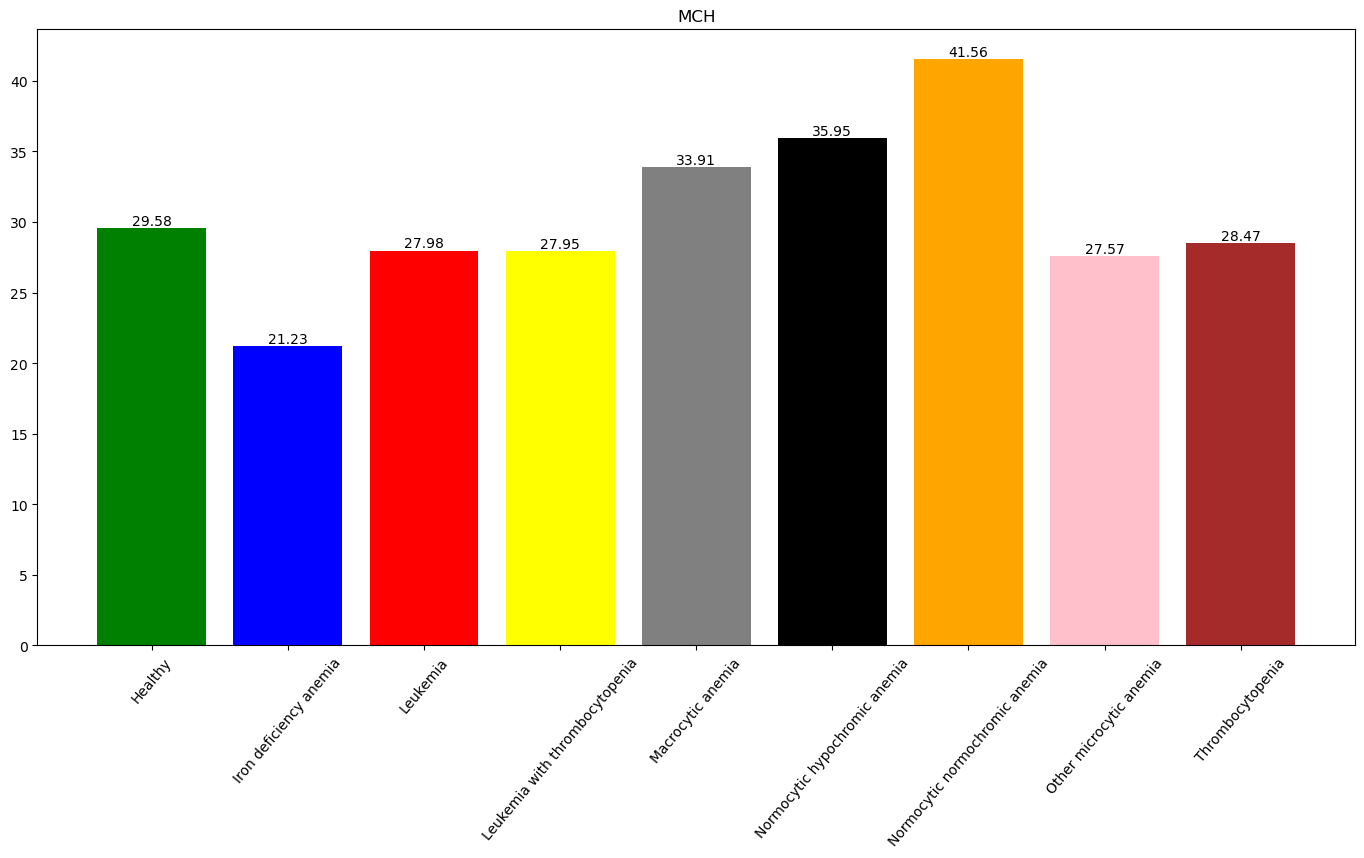

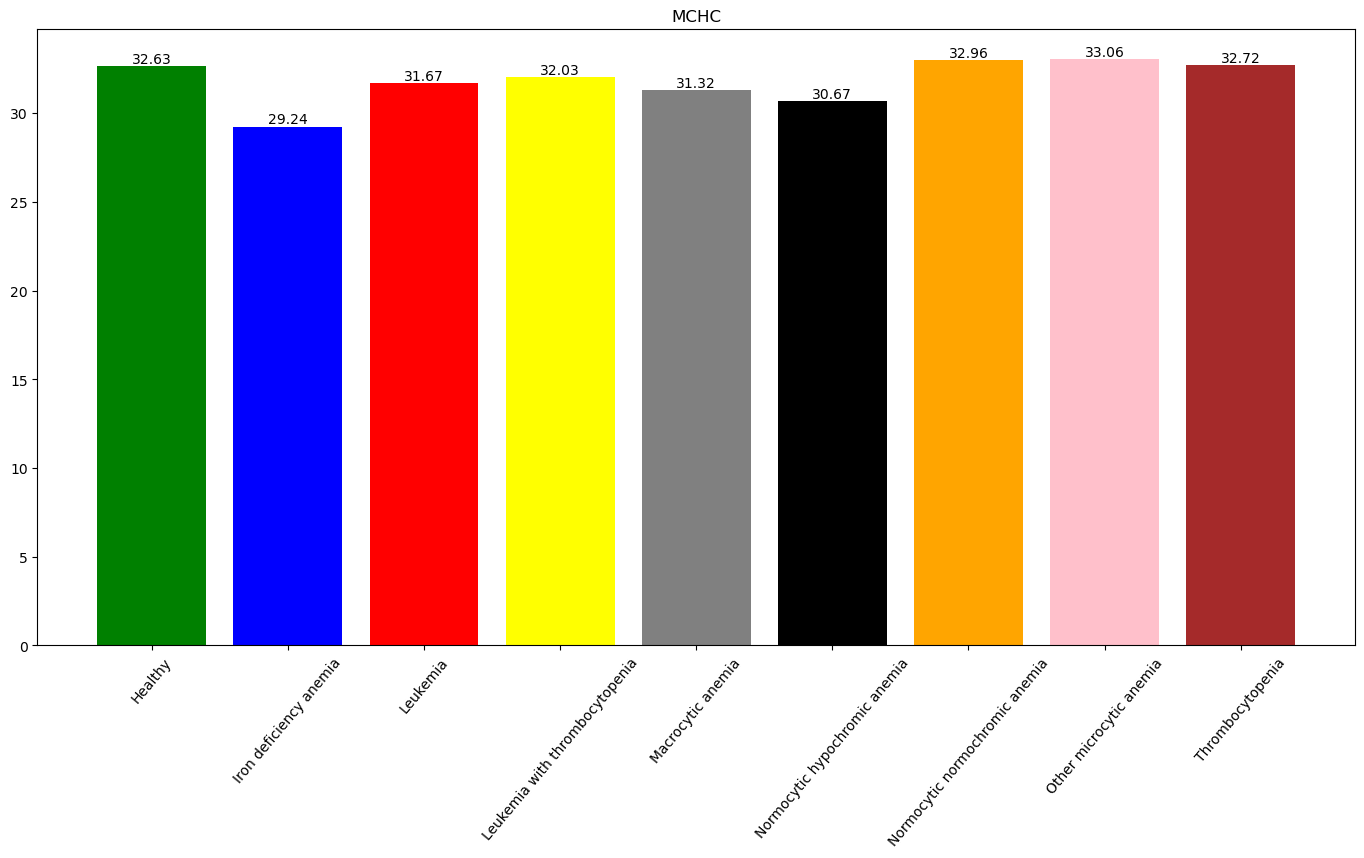

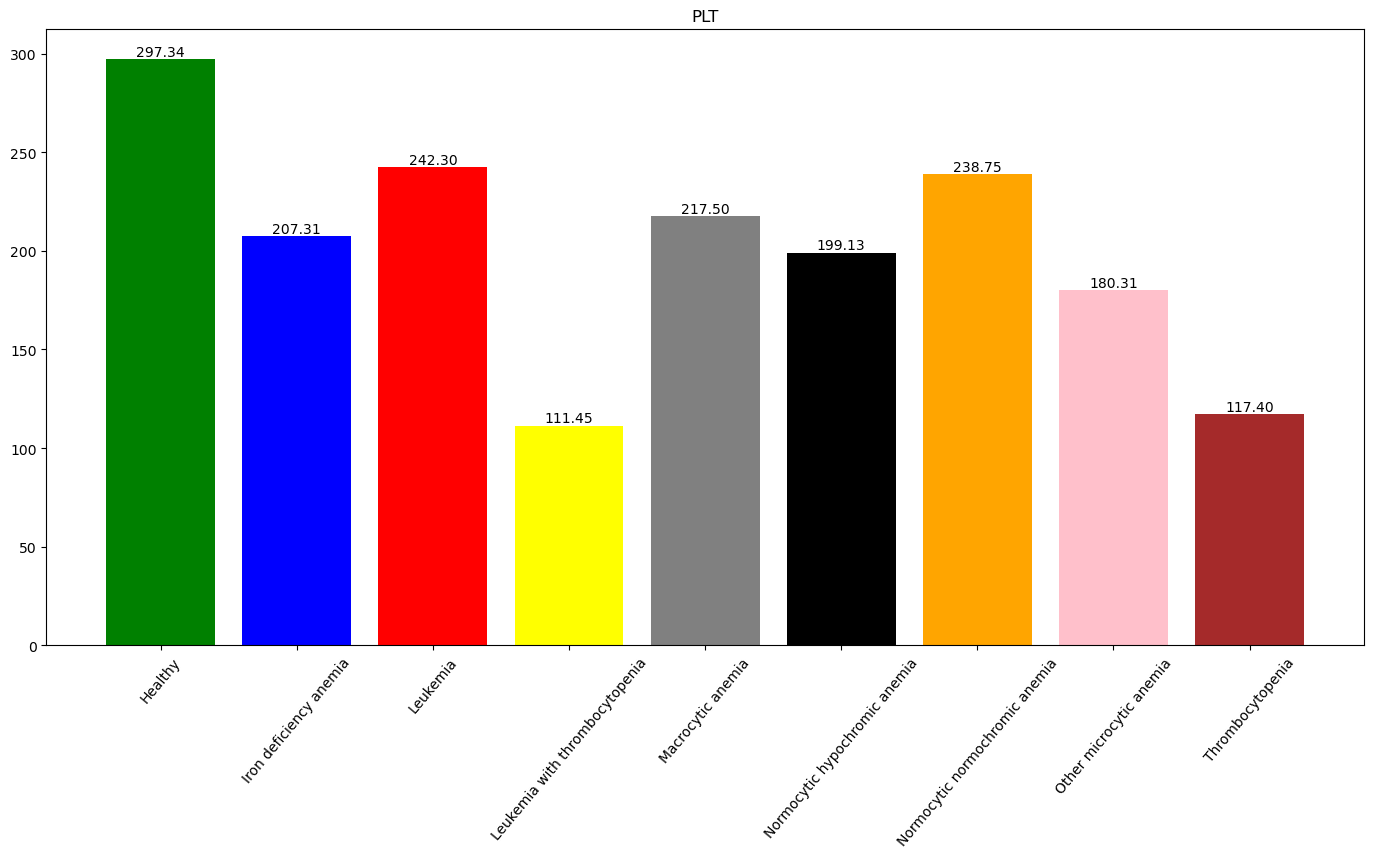

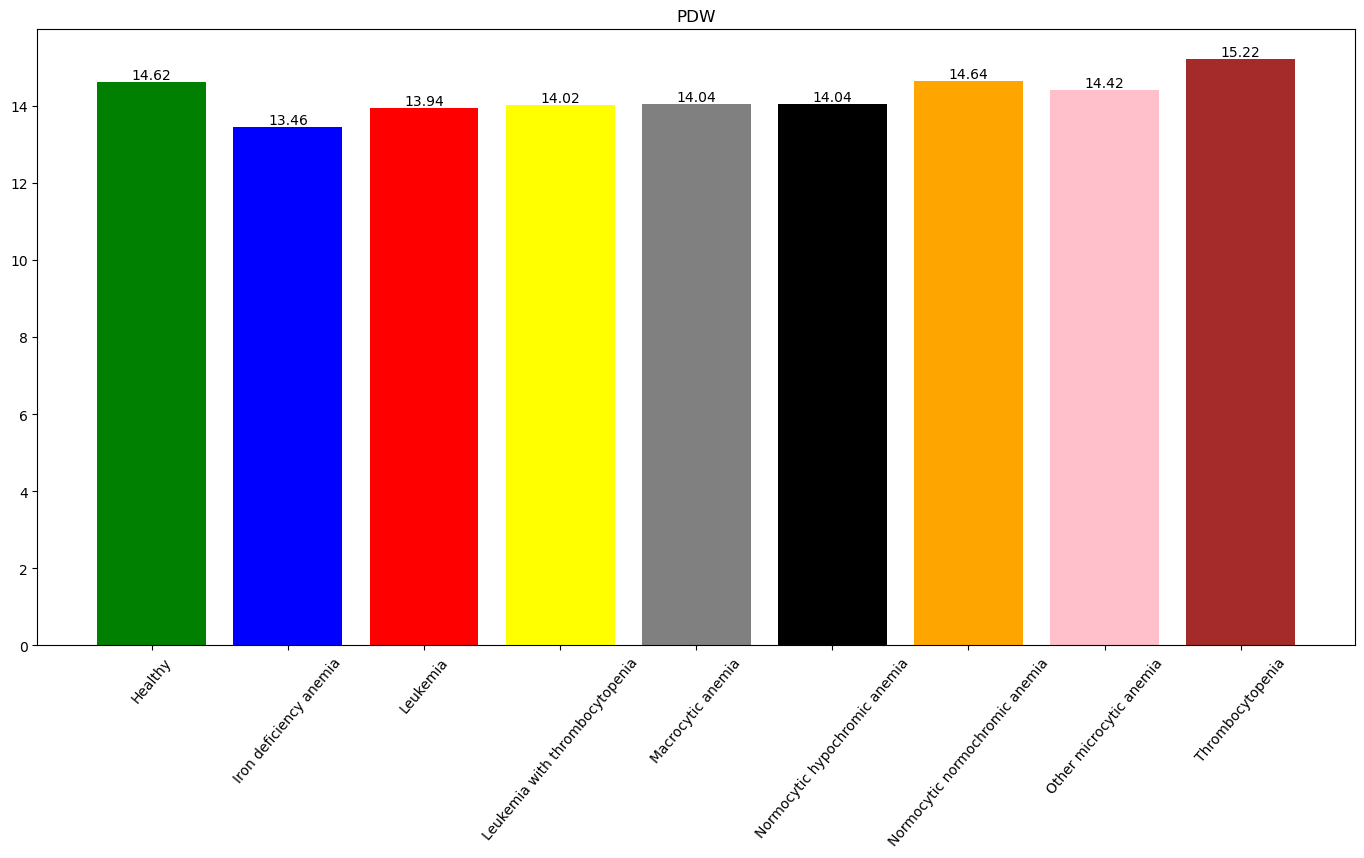

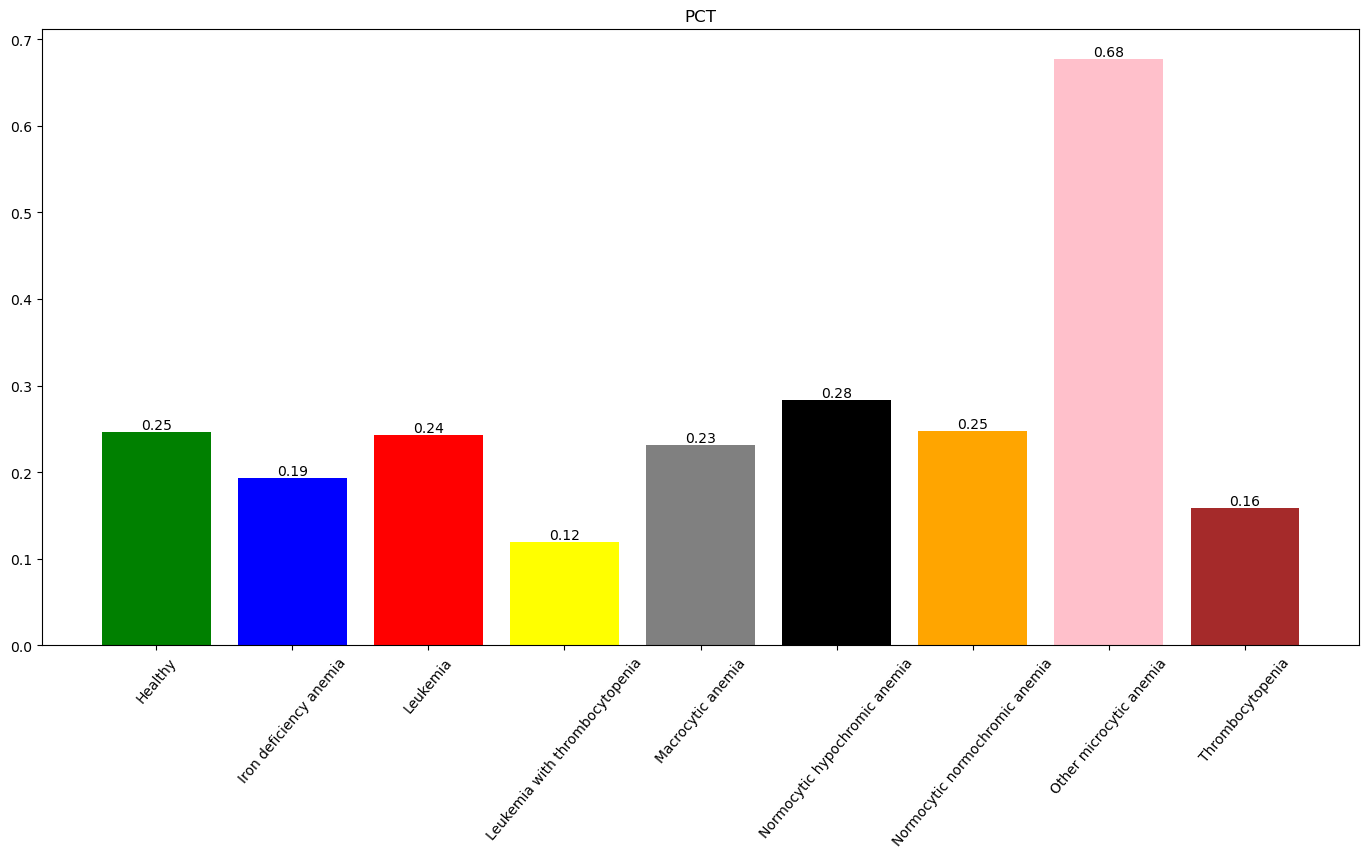

In [8]:
import pandas as pd
media_por_anemia = db.groupby('Diagnosis').mean()
lista_cores = ['green','blue','red','yellow','gray','black','orange','pink','brown']

for coluna in media_por_anemia.columns:
    plt.figure(figsize=(17,8))
    plt.bar(media_por_anemia.index, media_por_anemia[coluna], label = coluna, color=lista_cores)
    plt.title(f'{coluna}')
    plt.xticks(rotation=50)
    for i, valor in enumerate(media_por_anemia[coluna]):
        plt.text(i, valor, f'{valor:.2f}', ha='center', va='bottom')
    plt.plot()  


In [9]:
colunas_numericas = db.select_dtypes(include=[np.number]).columns

In [10]:
matriz_corr = db[colunas_numericas].corr()
matriz_corr

# Descarta-se quasquer tipo de forte correlação

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT
WBC,1.000000,-0.098685,-0.022998,0.379974,0.306216,0.029473,0.053450,-0.002289,-0.011190,-0.016255,-0.060900,0.211354,-0.026318,-0.004214
LYMp,-0.098685,1.000000,0.009017,0.465271,-0.296009,-0.031355,-0.012136,0.019576,-0.015431,-0.005443,-0.064747,0.047673,0.011715,-0.038542
NEUTp,-0.022998,0.009017,1.000000,-0.019970,-0.015514,-0.015369,-0.025144,-0.004367,0.000013,-0.003420,-0.004346,0.016326,-0.008418,-0.000491
LYMn,0.379974,0.465271,-0.019970,1.000000,0.047662,0.013261,0.016153,0.003046,-0.024092,-0.009649,-0.067572,0.072622,-0.014422,-0.019014
NEUTn,0.306216,-0.296009,-0.015514,0.047662,1.000000,0.029271,0.081665,0.091813,-0.014108,0.047501,-0.015920,0.022225,-0.038612,-0.043049
RBC,0.029473,-0.031355,-0.015369,0.013261,0.029271,1.000000,0.463446,-0.000816,-0.039550,-0.009109,-0.100370,0.004301,0.037160,-0.013501
HGB,0.053450,-0.012136,-0.025144,0.016153,0.081665,0.463446,1.000000,-0.000459,0.023494,0.001506,-0.029115,0.040231,0.135668,-0.053314
HCT,-0.002289,0.019576,-0.004367,0.003046,0.091813,-0.000816,-0.000459,1.000000,0.000813,0.608017,0.002065,-0.017894,0.088878,-0.012773
MCV,-0.011190,-0.015431,0.000013,-0.024092,-0.014108,-0.039550,0.023494,0.000813,1.000000,0.013114,0.094950,0.064139,0.021137,-0.043245
MCH,-0.016255,-0.005443,-0.003420,-0.009649,0.047501,-0.009109,0.001506,0.608017,0.013114,1.000000,0.015006,-0.032141,0.053705,0.008228


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


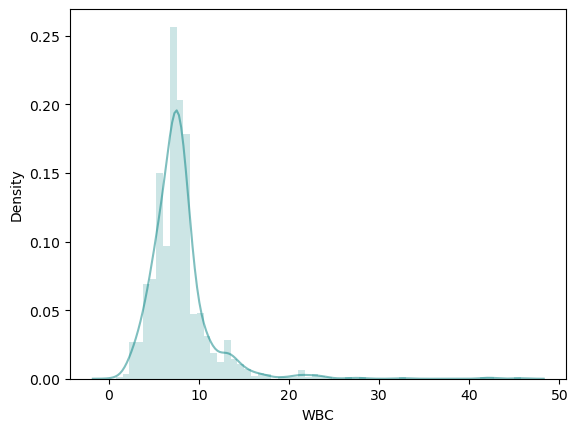

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


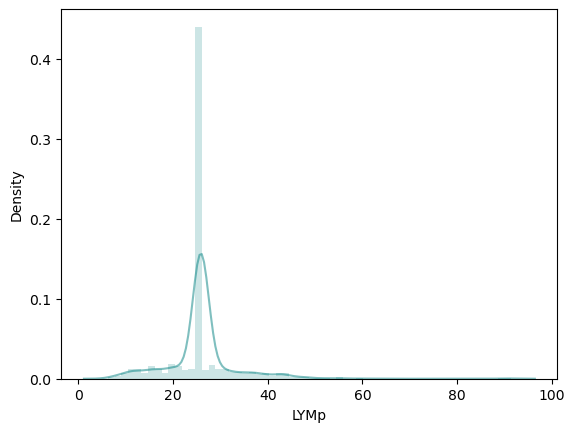

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


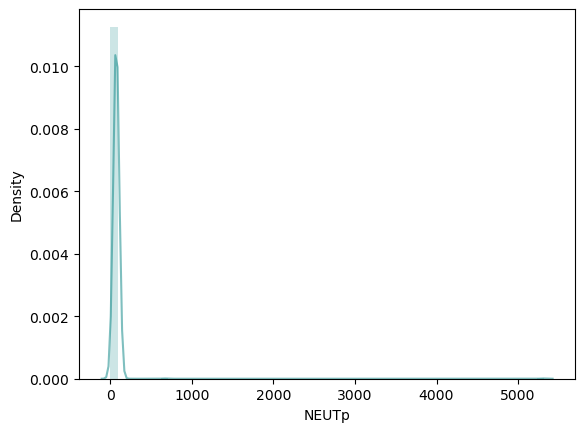

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


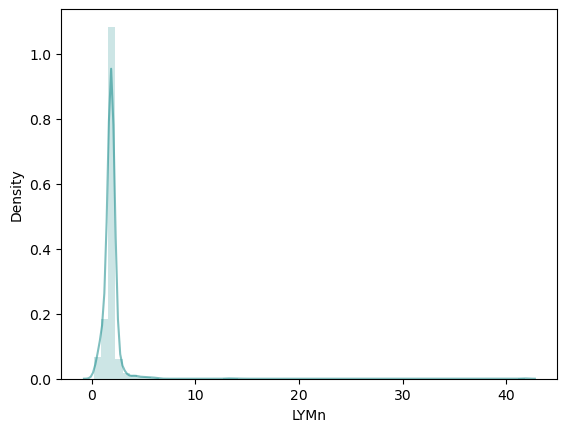

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


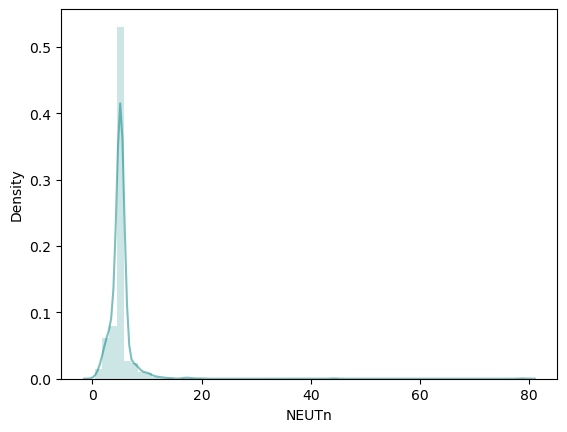

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


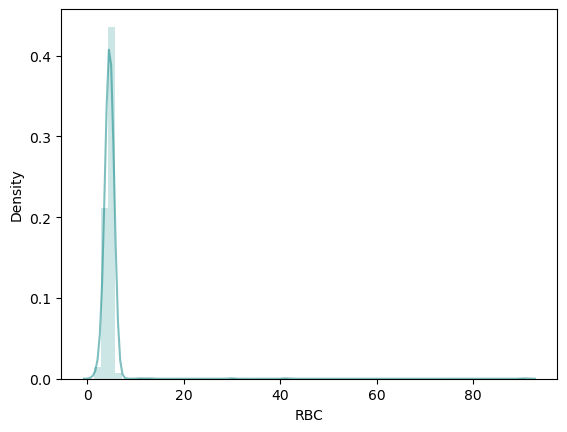

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


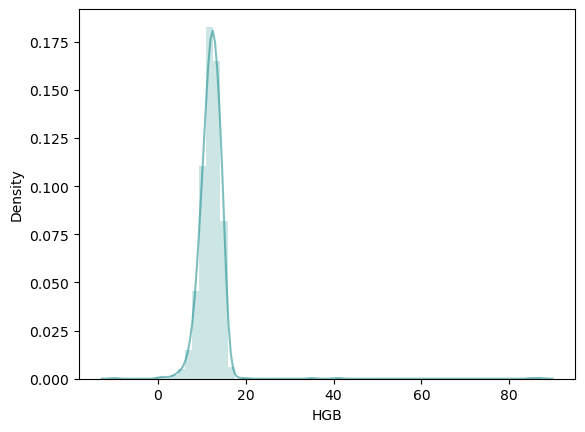

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


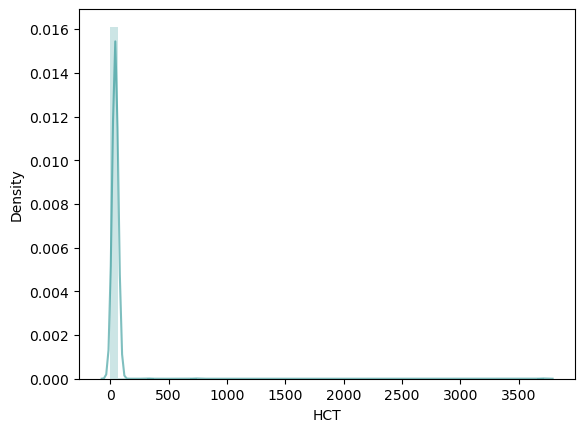

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


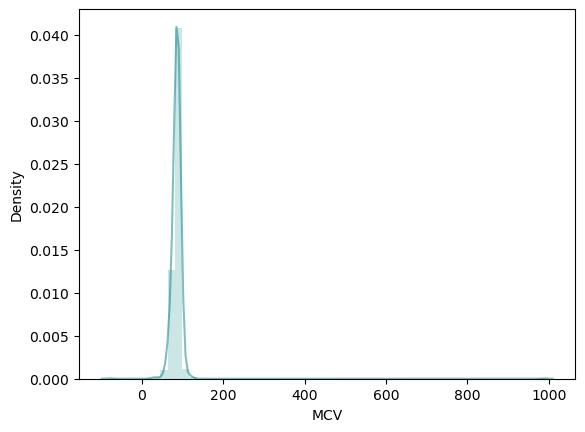

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


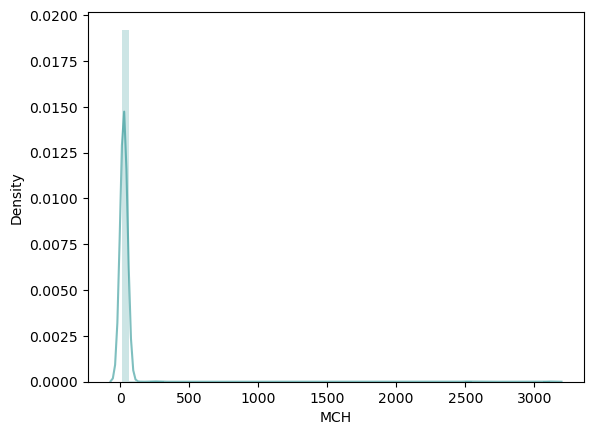

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


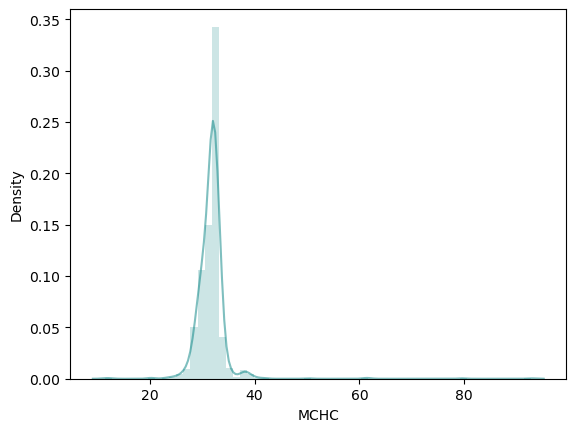

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


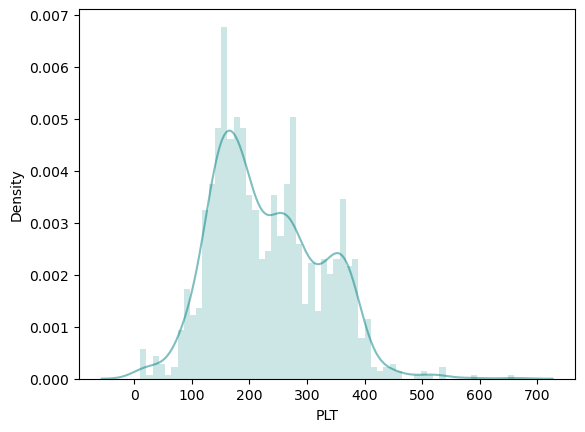

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


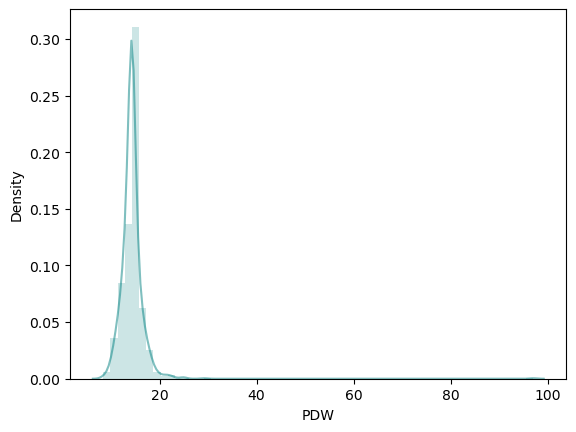

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


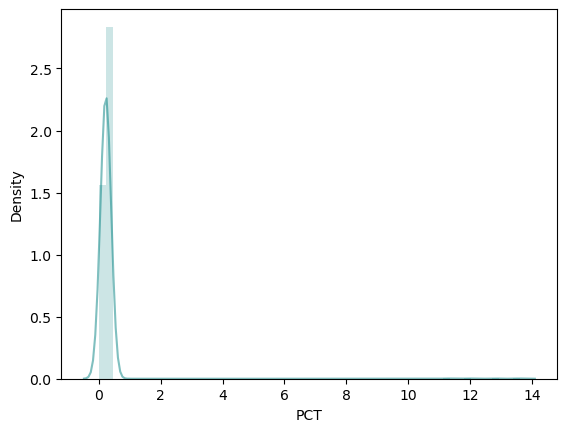

In [11]:
for i in db.drop("Diagnosis", axis=1).columns:
    
    kde = sns.kdeplot(data=db, x=i, color='teal', alpha=0.5)

    hist = plt.hist(db[i], bins=60, alpha=0.2, color='teal', density=True)
    
    plt.show()

In [12]:
lista_anemias

['Normocytic hypochromic anemia',
 'Iron deficiency anemia',
 'Other microcytic anemia',
 'Leukemia',
 'Healthy',
 'Thrombocytopenia',
 'Normocytic normochromic anemia',
 'Leukemia with thrombocytopenia',
 'Macrocytic anemia']

In [13]:
for j in range(len(db)):
    for i in range(len(lista_anemias)):
        if db.loc[j, 'Diagnosis'] == lista_anemias[i]:
            db.loc[j, 'Código Anemia'] = i
            break


In [15]:
db.columns

Index(['WBC', 'LYMp', 'NEUTp', 'LYMn', 'NEUTn', 'RBC', 'HGB', 'HCT', 'MCV',
       'MCH', 'MCHC', 'PLT', 'PDW', 'PCT', 'Diagnosis', 'Código Anemia'],
      dtype='object')

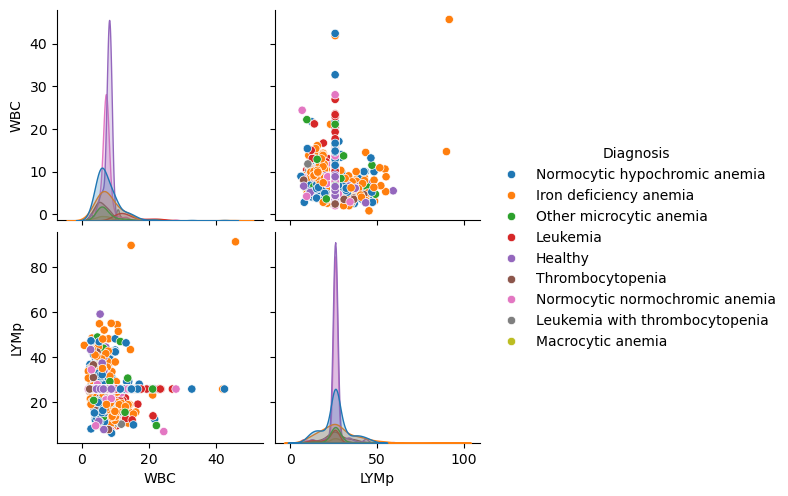

In [10]:
sns.pairplot(db[['WBC','LYMp','Diagnosis']],hue='Diagnosis')

In [11]:
from sklearn.model_selection import train_test_split


In [14]:
X = db.drop('Diagnosis', axis=1)
y = db['Diagnosis']

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoder = label_encoder.fit_transform(y)

In [29]:
y_encoder

array([5, 5, 1, ..., 0, 0, 0])

In [30]:
np.unique(y_encoder)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X_scaler,y_encoder,test_size=0.8,random_state=42,stratify=y_encoder)

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
from sklearn.metrics import accuracy_score

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
y_pred = decision_tree.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"{decision_tree.__class__.__name__}: {accuracy}")


DecisionTreeClassifier: 0.9736585365853658


In [74]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val,y_pred)

array([[269,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1, 150,   0,   0,   0,   0,   0,   0,   0],
       [  7,   0,  31,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   7,   0,   0,   1,   0,   0],
       [  0,   0,   0,   0,  14,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0, 222,   0,   0,   0],
       [  0,   0,   0,   1,   2,   5, 207,   0,   0],
       [  0,   3,   0,   0,   0,   0,   0,  42,   2],
       [  3,   0,   0,   0,   0,   0,   0,   0,  56]], dtype=int64)

[Text(0.5340909090909091, 0.9166666666666666, 'HGB <= 0.201\ngini = 0.81\nsamples = 256\nvalue = [67, 38, 9, 2, 4, 56, 54, 12, 14]\nclass = Normocytic hypochromic anemia'),
 Text(0.25, 0.75, 'MCHC <= 0.064\ngini = 0.71\nsamples = 161\nvalue = [0, 38, 0, 0, 4, 56, 53, 10, 0]\nclass = Other microcytic anemia'),
 Text(0.09090909090909091, 0.5833333333333334, 'MCV <= -0.217\ngini = 0.521\nsamples = 92\nvalue = [0, 38, 0, 0, 3, 51, 0, 0, 0]\nclass = Other microcytic anemia'),
 Text(0.045454545454545456, 0.4166666666666667, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0, 0, 0, 0, 0, 0, 0]\nclass = Normocytic hypochromic anemia'),
 Text(0.13636363636363635, 0.4166666666666667, 'MCV <= 0.514\ngini = 0.105\nsamples = 54\nvalue = [0, 0, 0, 0, 3, 51, 0, 0, 0]\nclass = Other microcytic anemia'),
 Text(0.09090909090909091, 0.25, 'gini = 0.0\nsamples = 51\nvalue = [0, 0, 0, 0, 0, 51, 0, 0, 0]\nclass = Other microcytic anemia'),
 Text(0.18181818181818182, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 

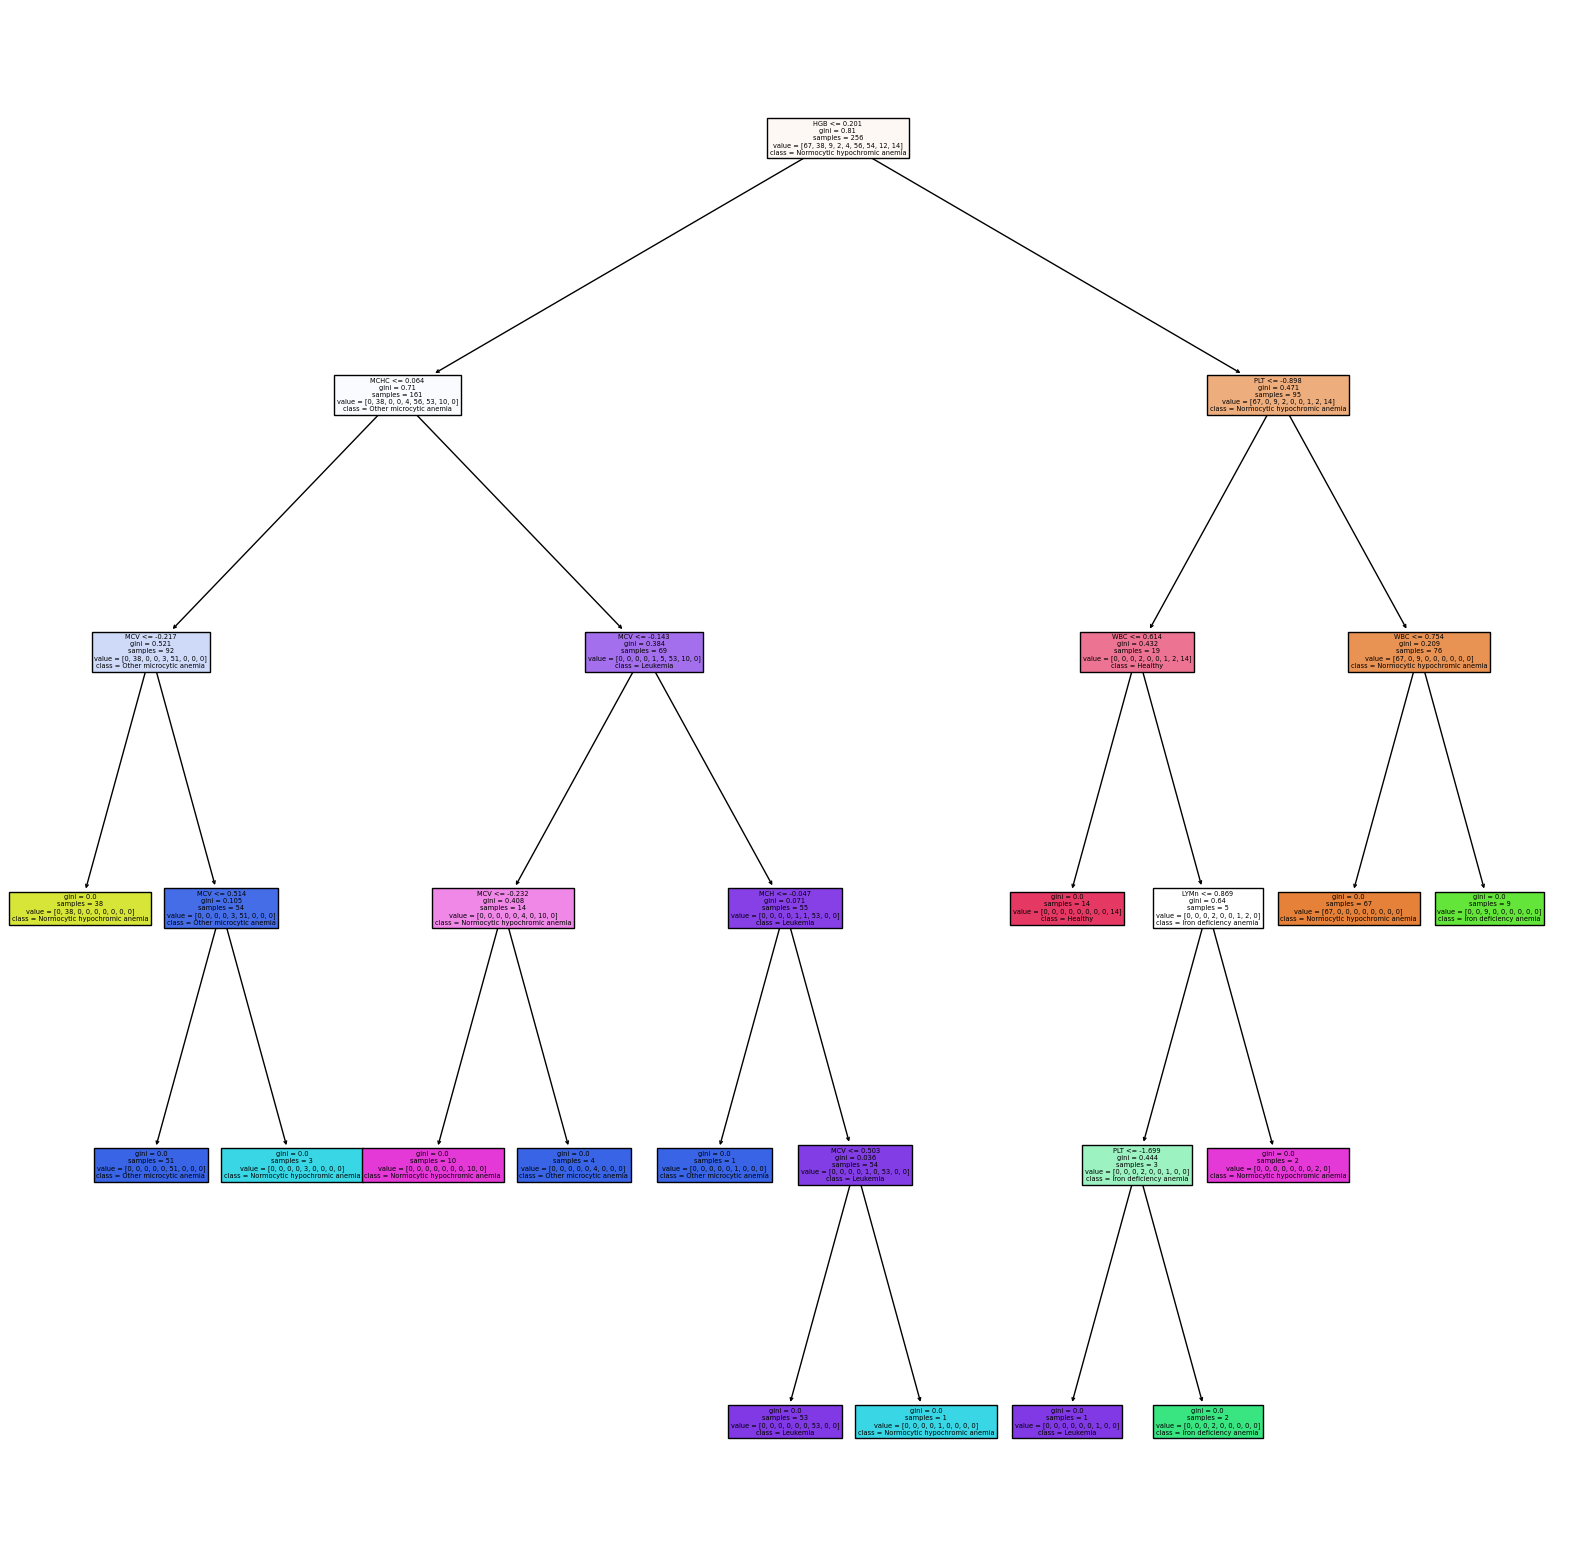

In [84]:
from sklearn import tree
import matplotlib.pyplot as plt
figura,eixos = plt.subplots(nrows=1,ncols=1,figsize=(20,20))
tree.plot_tree(decision_tree, feature_names=X.columns, class_names=y,filled = True)

